<h2>About this Project</h2>
<p>In this project, you will compute the bias, variance, and noise.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

<h2>Bias-Variance Decomposition</h2>

<p>
Recall that the squared error can be decomposed into <em>bias</em>, <em>variance</em> and <em>noise</em>: 
$$
    \underbrace{\mathbb{E}[(h_D(\mathbf{x}) - y)^2]}_\mathrm{Error} = \underbrace{\mathbb{E}[(h_D(\mathbf{x})-\bar{h}(\mathbf{x}))^2]}_\mathrm{Variance} + \underbrace{\mathbb{E}[(\bar{h}(\mathbf{x})-\bar{y}(\mathbf{x}))^2]}_\mathrm{Bias} + \underbrace{\mathbb{E}[(\bar{y}(\mathbf{x})-y(\mathbf{x}))^2]}_\mathrm{Noise}\nonumber
$$
    
We will now create a data set for which we can approximately compute this decomposition. 
The function <strong>`toydata`</strong> generates a binary data set with class $1$ and $2$. Both are sampled from Gaussian distributions:
$$
p(\mathbf{x}|y=1)\sim {\mathcal{N}}(0,{I}) \textrm { and } p(\mathbf{x}|y=2)\sim {\mathcal{N}}(\mu_2,{I}),
$$

where $\mathbf{\mu_2}=[1.75, 1.75]^\top$ (the global variable <code>OFFSET</code> $\!=\!1.75$ regulates these values: $\mathbf{\mu_2}=[$<code>OFFSET</code> $, $ <code>OFFSET</code>$]^\top$).
</p>

<h3>Computing noise, bias and variance</h3>
<p>
    You will need to modify five functions: <strong><code>computeybar</code></strong>,<strong><code>computenoise</code></strong>, <strong><code>computehbar</code></strong>, <strong><code>computebias</code></strong>, and <strong><code>computevariance</code></strong>. The functions <strong><code>computeybar</code></strong> and <strong><code>computehbar</code></strong> are helper functions to calculate the three components of squared error.
    
First take a look at <strong><code>biasvariancedemo</code></strong> and make sure you understand where each function should be called and how they contribute to the Bias/Variance/Noise decomposition. <br/><br/>
</p>

## Getting Started

Before you get started, let's import a few packages that you will need.

In [3]:
import numpy as np
from numpy.matlib import repmat
import matplotlib
import matplotlib.pyplot as plt
from helper import *

%matplotlib inline

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


<h3><code>toydata</code> Helper Function</h3> 

<p><code>toydata</code> is a helper function used to generate the the binary data with $n/2$ values in class 1 and $n/2$ values in class 2. Class 1 is the label for data drawn from a normal distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$. Class 2 is the label for data drawn from a normal distribution with $\mu = $<code>OFFSET</code> and $\sigma = 1$. Run the code below to get a visualization of the data.</p>

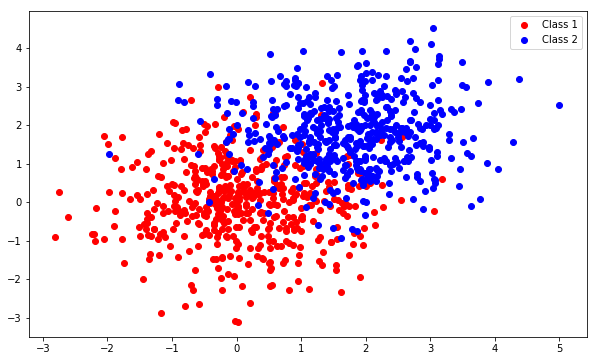

In [4]:
OFFSET = 1.75
X, y = toydata(OFFSET, 1000)

# Visualize the generated data
ind1 = y == 1
ind2 = y == 2
plt.figure(figsize=(10,6))
plt.scatter(X[ind1, 0], X[ind1, 1], c='r', marker='o', label='Class 1')
plt.scatter(X[ind2, 0], X[ind2, 1], c='b', marker='o', label='Class 2')
plt.legend();

<h3>Part One: Noise [Graded]</h3>
<p>First, let's focus on the noise. For this, you need to compute the expected label for a given input $\mathbf{x}$:
    
$$\bar y(\mathbf{x})=1*p(y=1\;|\;\mathbf{x})+2*p(y=2\;|\;\mathbf{x})$$ 

in  <strong><code>computeybar</code></strong>. You can compute the probability $p(\mathbf{x}|y)$ with the equations $p(\mathbf{x}|y=1)\sim {\mathcal{N}}(0,{I}) \textrm { and } p(\mathbf{x}\;|\;y=2)\sim {\mathcal{N}}(\mathbf{\mu_2},{I})$. Then use Bayes rule to compute  </p><br>
$$p(y=1|\mathbf{x})=\frac{p(\mathbf{x}\;|\;y=1)p(y=1)}{p(\mathbf{x}\;|\;y=1)p(y=1)+p(\mathbf{x}\;|\;y=2)p(y=2)}$$
    
<p><strong>Note:</strong> You may want to use the function <em>`normpdf`</em> to compute $p(\mathbf{x}\;|\;y_i)$, which is defined for  you in <strong><code>computeybar</code></strong> in the following cell. Note that <code>normpdf</code> only computes $p(x\;|\;y)$ in a single dimension, but you can use the fact that both dimensions are independent to obtain for example $p(\mathbf{x}\;|\;y=1)=p(x_1\;|\;y=1)p(x_2\;|\;y=1)$. Remember: class 1 has $\mu=[0;0]^T,\sigma=1$; class 2 has $\mu=[OFFSET;OFFSET]^T,\sigma=1$.
<br/></p>

In [5]:
def computeybar(xTe, OFFSET):
    """
    function [ybar]=computeybar(xTe, OFFSET);

    computes the expected label 'ybar' for a set of inputs x
    generated from two standard Normal distributions (one offset by OFFSET in
    both dimensions.)

    INPUT:
    xTe       : nx2 array of n vectors with 2 dimensions
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.

    OUTPUT:
    ybar : a nx1 vector of the expected labels for vectors xTe
    noise: 
    """
    n, d = xTe.shape
    ybar = np.zeros(n)
    
    # Feel free to use the following function to compute p(x|y)
    # By default, mean is 0 and std. deviation is 1.
    normpdf = lambda x, mu, sigma: np.exp(-0.5 * np.power((x - mu) / sigma, 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    # YOUR CODE HERE
    c1 = normpdf(xTe,0,1)
    c2 = normpdf(xTe,OFFSET,1)
    
    c1 = np.multiply(c1[:,0],c1[:,1])
    c2 = np.multiply(c2[:,0],c2[:,1])
    
    b1 = c1 + 2*c2
    b2 = c1 + c2
    
    ybar = b1 / b2
    
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    return ybar

In [6]:
def test_ybar1():
    OFFSET = 2
    n = 1000
    xTe, yTe = toydata(OFFSET, n) # Generate n datapoints
    ybar = computeybar(xTe, OFFSET)
    
    return ybar.shape == (n, ) # the output of your ybar should be a n dimensional array

def test_ybar2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    ybar = computeybar(xTe, OFFSET)
    return np.isclose(np.mean(np.power(yTe - ybar, 2)), 0)

def test_ybar3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    ybar = computeybar(xTe, OFFSET)
    
    return np.mean(np.power(yTe - ybar, 2)) < 0.0002 # make sure the noise is small

runtest(test_ybar1, 'test_ybar1')
runtest(test_ybar2, 'test_ybar2')
runtest(test_ybar3, 'test_ybar3')

Running Test: test_ybar1 ... ✔ Passed!
Running Test: test_ybar2 ... ✔ Passed!
Running Test: test_ybar3 ... ✔ Passed!


In [7]:
# Autograder test cell - worth 1 point
# runs test_ybar1

In [8]:
# Autograder test cell - worth 1 point
# runs test_ybar2

In [9]:
# Autograder test cell - worth 1 point
# runs test_ybar3

<p> Now, calculate the noise component $\mathbb{E}[(\bar{y}(\mathbf{x})-y(\mathbf{x}))^2]$ of the error using the results of <strong><code>computeybar</code></strong> that you implemented above. Remember that $$\mathbb{E}[(\bar{y}(\mathbf{x})-y(\mathbf{x}))^2] = \frac{1}{n}\sum_{i=1}^n(\bar{y}({x_i})-y({x_i}))^2$$
and that <strong><code>computeybar</code></strong> computes $\bar{y}(\mathbf{x}) = [\bar{y}({x_1})\dots \bar{y}({x_n})]$. </p>

In [10]:
def computenoise(xTe, yTe, OFFSET):
    """
    function noise=computenoise(xTe, OFFSET);

    computes the noise, or square mean of ybar - y, for a set of inputs x
    generated from two standard Normal distributions (one offset by OFFSET in
    both dimensions.)

    INPUT:
    xTe       : nx2 array of n vectors with 2 dimensions
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.

    OUTPUT:
    noise:    : a scalar representing the noise component of the error of xTe
    """
    noise = 0
    
    # YOUR CODE HERE
    n = xTe.shape[0]
    ybar = computeybar(xTe,OFFSET)
    noise = np.sum((ybar - yTe)**2)
    noise = 1/n * noise
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return noise
    

In [11]:
def test_noise1():
    OFFSET = 2
    n = 1000
    xTe, yTe = toydata(OFFSET, n) # Generate n datapoints
    noise = computenoise(xTe, yTe, OFFSET)
    
    return np.isscalar(noise) 

def test_noise2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    noise = computenoise(xTe, yTe, OFFSET)
    return np.isclose(noise,0)

def test_noise3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    ybar = computeybar(xTe, OFFSET)
    noise = computenoise(xTe,yTe,OFFSET)
    
    return noise < 0.0002 # make sure the noise is small

runtest(test_noise1, 'test_noise1')
runtest(test_noise2, 'test_noise2')
runtest(test_noise3, 'test_noise3')

Running Test: test_noise1 ... ✔ Passed!
Running Test: test_noise2 ... ✔ Passed!
Running Test: test_noise3 ... ✔ Passed!


In [12]:
# Autograder test cell - worth 1 point
# runs test_noise1

In [13]:
# Autograder test cell - worth 1 point
# runs test_noise2

In [14]:
# Autograder test cell - worth 1 point
# runs test_noise3

<h3>Visualizing the Data</h3>
<p>You can now see the error of the bayes classifier. Below is a plotting of the two classes of points and the misclassified points.</p>

Error of Bayes classifier: 10.60%.
Noise: 0.0755


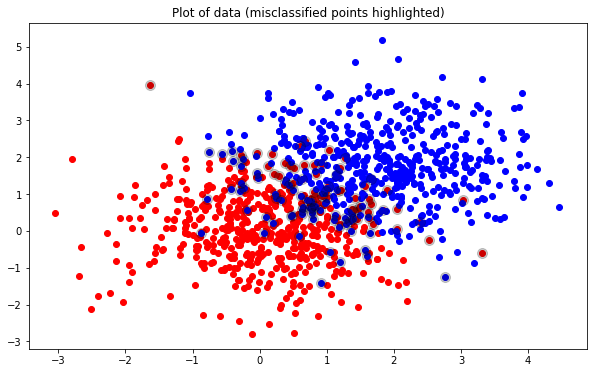

In [15]:
OFFSET = 1.75
np.random.seed(1)
xTe, yTe = toydata(OFFSET, 1000)

# compute Bayes Error
ybar = computeybar(xTe, OFFSET)
predictions = np.round(ybar)
errors = predictions != yTe
err = errors.sum() / len(yTe) * 100
print('Error of Bayes classifier: %.2f%%.' % err)

# print out the noise
print('Noise: %.4f' % computenoise(xTe, yTe, OFFSET))

# plot data
ind1 = yTe == 1
ind2 = yTe == 2
plt.figure(figsize=(10,6))
plt.scatter(xTe[ind1, 0], xTe[ind1, 1], c='r', marker='o')
plt.scatter(xTe[ind2, 0], xTe[ind2, 1], c='b', marker='o')
plt.scatter(xTe[errors, 0], xTe[errors, 1], c='k', s=100, alpha=0.2)
plt.title("Plot of data (misclassified points highlighted)")
plt.show()

As you can see from the graph above, the dataset is noisy and cannot be classified into two groups cleanly, thus giving nonzero noise and nonzero bayes error!

<h3>Part Two: Bias [Graded]</h3>

<p>For the bias, you will need the average classifier $\bar{h}$. Although we cannot compute the expected value  $\bar h\!=\!\mathbb{E}[h]$, we can approximate it by sampling many training sets $D_1, \dots, D_m$ and training a classifier on each, getting $h_{D_1},\dots, h_{D_m}$. You can then average their predictions on each data point:</p> $$\bar{h}(\mathbf{x})\approx \frac{1}{m}\sum_{i=1}^m h_{D_i}(\mathbf{x})$$
    
 <p>Edit the function <strong><code>computehbar</code></strong> to do this. Average over <code>NMODELS</code> ($m$) different $h_D$, each trained on a different data set of <code>Nsmall</code> inputs drawn from the same distribution. Feel free to call <strong><code>toydata(OFFSET, Nsmall)</code></strong> to obtain more data sets. 
</p>

We are going to use the regression tree that we used in our previous project as our $h_D$ . To remind you, the following code shows you how to instantiate a decision tree:

In [16]:
xTr, yTr = toydata(OFFSET, 100)

# Create a regression tree with no restriction on its depth
# if you want to create a tree of depth k
# then call RegressionTree(depth=k)
tree = RegressionTree(depth=np.inf)

# To fit/train the regression tree
tree.fit(xTr, yTr)

# To use the trained regression tree to make prediction
pred = tree.predict(xTr)

In [17]:
def computehbar(xTe, depth, Nsmall, NMODELS, OFFSET):
    """
    function [hbar]=computehbar(xTe, sigma, lmbda, NSmall, NMODELS, OFFSET);

    computes the expected prediction of the average regression tree (hbar)
    for data set xTe. 

    The regression tree should be trained using data of size Nsmall and is drawn from toydata with OFFSET 
    

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       | nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    depth     | Depth of the tree 
    NSmall    | Number of points to subsample
    NMODELS   | Number of Models to average over
    OFFSET    | The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    OUTPUT:
    hbar | nx1 vector with the predictions of hbar for each test input
    """
    n = xTe.shape[0]
    hbar = np.zeros(n)
    
    # YOUR CODE HERE
    m = NMODELS
    for i in range(m):
        xTr, yTr = toydata(OFFSET,Nsmall)
        tree = RegressionTree(depth = depth)
        tree.fit(xTr,yTr)
        hbar += tree.predict(xTe)
    
    hbar = hbar / m
    
    
    
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    return hbar

In [18]:
def test_hbar1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = toydata(OFFSET, n)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    return hbar.shape == (n, ) # the dimension of hbar should be (n, )

def test_hbar2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 1
    
    # since the mean is far apart, the tree should be able to learn perfectly
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    ybar = computeybar_grader(xTe, OFFSET)
    bias = np.mean(np.power(hbar-ybar,2))
    return np.isclose(bias, 0) # the bias should be close to zero

def test_hbar3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    np.random.seed(1)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    ybar = computeybar_grader(xTe, OFFSET)
    bias = np.mean(np.power(hbar-ybar, 2))
    return np.abs(bias - 0.0017) < 0.001 # the bias should be close to 0.007

runtest(test_hbar1, 'test_hbar1')
runtest(test_hbar2, 'test_hbar2')
runtest(test_hbar3, 'test_hbar3')

Running Test: test_hbar1 ... ✔ Passed!
Running Test: test_hbar2 ... ✔ Passed!
Running Test: test_hbar3 ... ✔ Passed!


In [19]:
# Autograder test cell - worth 1 point
# runs test_hbar1

In [20]:
# Autograder test cell - worth 1 point
# runs test_hbar2

In [21]:
# Autograder test cell - worth 1 point
# runs test_hbar3

<h4>Bias Continued [Graded]</h4>

Now, we're equipped to calculate the bias $\mathbb{E}[(\bar{h}(\mathbf{x})-\bar{y}(\mathbf{x}))^2]$. In this case, you need to compute the mean of the squared difference over your input points: 
$$\mathbb{E}[(\bar{h}(\mathbf{x})-\bar{y}(\mathbf{x}))^2] = \frac{1}{n}\sum_{i=1}^n(\bar{h}({x_i})-\bar{y}({x_i}))^2$$

You can call both <code><strong>computehbar</strong></code> and <code><strong>computeybar</strong></code> to calculate the bias.


In [22]:
def computebias(xTe, depth, Nsmall, NMODELS, OFFSET):
    """
    function bias = computebias(xTe, sigma, lmbda, NSmall, NMODELS, OFFSET);

    computes the bias for data set xTe. 

    The regression tree should be trained using data of size Nsmall and is drawn from toydata with OFFSET 
    

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       | nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    depth     | Depth of the tree 
    NSmall    | Number of points to subsample
    NMODELS   | Number of Models to average over
    OFFSET    | The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    OUTPUT:
    bias | a scalar representing the bias of the input data
    """
    noise = 0
    
    # YOUR CODE HERE
    n = xTe.shape[0]
    h = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    y = computeybar(xTe,OFFSET)
    bias = np.mean((h - y)**2)
    
    
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return bias

In [23]:
def test_bias1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = toydata(OFFSET, n)
    bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
    return np.isscalar(bias) # the dimension of hbar should be (n, )

def test_bias2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 1
    
    # since the mean is far apart, the tree should be able to learn perfectly
    bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
    return np.isclose(bias, 0) # the bias should be close to zero

def test_bias3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
    return np.abs(bias - 0.0017) < 0.001 # the bias should be close to 0.007

runtest(test_bias1, 'test_bias1')
runtest(test_bias2, 'test_bias2')
runtest(test_bias3, 'test_bias3')

Running Test: test_bias1 ... ✔ Passed!
Running Test: test_bias2 ... ✔ Passed!
Running Test: test_bias3 ... ✔ Passed!


In [24]:
# Autograder test cell - worth 1 point
# runs test_bias1

In [25]:
# Autograder test cell - worth 1 point
# runs test_bias2

In [26]:
# Autograder test cell - worth 1 point
# runs test_bias3

<h3>Part Three: Variance [Graded]</h3>
<p>Finally, to compute the variance, we need to compute the term $\mathbb{E}[(h_D-\bar{h})^2]$. We will calculate it directly by editing <strong><code>computevariance</code></strong>. 
    
We can approach this calculation by first considering $\bar{v}(\mathbf{x})= (h_D(\mathbf x)-\bar{h} ( \mathbf x))^2$. Once again, you cannot compute the expected value exactly, but you can  approximate this term by averaging over <code>NMODELS</code> models. You can use your previous function to compute $\bar{h}$, and then estimate
$$\bar{v}(\mathbf{x})=\mathbb{E}_D[(h_D(\mathbf{x})-\bar{h}(\mathbf{x}))^2]\approx \frac{1}{m}\sum_{j=1}^m(h_{D_j}(\mathbf{x_i})-\bar{h}(\mathbf{x_i}))^2$$
where once again $D_1,\dots,D_m$ are i.i.d. training data sets. Note that the output of this function is a vector; in other words, you should not be taking an average over the $n$ input points.
</p>

Finally, you will need to return the variance itself, which is $$\mathbb{E}[(h_D(\mathbf{x})-\bar{h}(\mathbf{x}))^2] = \mathbb{E}[\bar{v}(\mathbf{x})] = \frac{1}{n}\sum_{i=1}^n \bar{v}({x}_i)$$

In [36]:
def computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET):
    """
    function variance=computevbar(xTe,sigma,lmbda,hbar,Nsmall,NMODELS,OFFSET)

    computes the variance of classifiers trained on data sets from
    toydata.m with pre-specified "OFFSET" and 
    with kernel regression with sigma and lmbda
    evaluated on xTe. 
    the prediction of the average classifier is assumed to be stored in "hbar".

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       : nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    depth     : Depth of the tree 
    hbar      : nx1 vector of the predictions of hbar on the inputs xTe
    Nsmall    : Number of samples drawn from toyData for one model
    NModel    : Number of Models to average over
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    
    OUTPUT:
    vbar      : nx1 vector of the difference between each model prediction and the
                average model prediction for each input
                
    """
    n = xTe.shape[0]
    vbar = np.zeros(n)
    variance = 0
    
    # YOUR CODE HERE
    m = NMODELS
    for i in range(m):
        xTr,yTr = toydata(OFFSET,Nsmall)
        tree = RegressionTree(depth=depth)
        tree.fit(xTr,yTr)
        hd = tree.predict(xTe)
        vbar += 1/m * np.mean((hd - hbar)**2, axis = 0)
    variance = np.mean(vbar,axis = 0)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return variance

In [37]:
def test_variance1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = toydata(OFFSET, n)
    hbar = computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET)
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.isscalar(var) # variance should be a scalar

def test_variance2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 10
    
    # since the noise is negligible, the tree should be able to learn perfectly
    hbar = computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.isclose(var, 0) # the bias should be close to zero

def test_variance3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    np.random.seed(1)
    # since the noise is negligible, the tree should be able to learn perfectly
    hbar = computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.abs(var - 0.0404) < 0.0015 # the variance should be close to 0.0404

runtest(test_variance1, 'test_variance1')
runtest(test_variance2, 'test_variance2')
runtest(test_variance3, 'test_variance3')

Running Test: test_variance1 ... ✔ Passed!
Running Test: test_variance2 ... ✔ Passed!
Running Test: test_variance3 ... ✔ Passed!


In [38]:
# Autograder test cell - worth 1 point
# runs test_variance1

In [39]:
# Autograder test cell - worth 1 point
# runs test_variance2

In [40]:
# Autograder test cell - worth 1 point
# runs test_variance3

<h3>Review the Error for Various Depths</h3>

<p>If you did everything in the three previous graded sections correctly and execute the following cell, you should see how the error decomposes (roughly) into bias, variance and noise for various depths.</p>

In [41]:
# biasvariancedemo

OFFSET = 1.75
# how big is the training set size N
Nsmall = 75
# how big is a really big data set (approx. infinity)
Nbig = 7500
# how many models do you want to average over
NMODELS = 100
# What regularization constants to evaluate
depths = [0, 1, 2, 3, 4, 5, 6, np.inf]

# we store
Ndepths = len(depths)
lbias = np.zeros(Ndepths)
lvariance = np.zeros(Ndepths)
ltotal = np.zeros(Ndepths)
lnoise = np.zeros(Ndepths)
lsum = np.zeros(Ndepths)

# Different regularization constant classifiers
for i in range(Ndepths):
    depth = depths[i]
    # use this data set as an approximation of the true test set
    xTe,yTe = toydata(OFFSET, Nbig)
    
    # Estimate AVERAGE ERROR (TOTAL)
    total = 0
    for j in range(NMODELS):
        # Set the seed for consistent behavior
        xTr2,yTr2 = toydata(OFFSET, Nsmall)
        model = RegressionTree(depth=depth)
        model.fit(xTr, yTr)
        total += np.mean((model.predict(xTe) - yTe) ** 2)
    total /= NMODELS
    
    # Estimate Noise
    noise = computenoise(xTe, yTe, OFFSET)
    
    # Estimate Bias
    bias = computebias(xTe,depth,Nsmall, NMODELS, OFFSET)
    
    # Estimating VARIANCE
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    variance = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    
    # print and store results
    lbias[i] = bias
    lvariance[i] = variance
    ltotal[i] = total
    lnoise[i] = noise
    lsum[i] = lbias[i]+lvariance[i]+lnoise[i]
    
    if np.isinf(depths[i]):
        print('Depth infinite: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lbias[i],lvariance[i],lnoise[i],lsum[i],ltotal[i]))
    else:
        print('Depth: %d: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (depths[i],lbias[i],lvariance[i],lnoise[i],lsum[i],ltotal[i]))
        

Depth: 0: Bias: 0.1716 Variance: 0.0000 Noise: 0.0764 Bias+Variance+Noise: 0.2480 Test error: 0.2500
Depth: 1: Bias: 0.0303 Variance: 0.0552 Noise: 0.0792 Bias+Variance+Noise: 0.1648 Test error: 0.1578
Depth: 2: Bias: 0.0053 Variance: 0.0407 Noise: 0.0771 Bias+Variance+Noise: 0.1232 Test error: 0.1181
Depth: 3: Bias: 0.0037 Variance: 0.0469 Noise: 0.0770 Bias+Variance+Noise: 0.1276 Test error: 0.1271
Depth: 4: Bias: 0.0025 Variance: 0.0706 Noise: 0.0820 Bias+Variance+Noise: 0.1550 Test error: 0.1418
Depth: 5: Bias: 0.0021 Variance: 0.0778 Noise: 0.0768 Bias+Variance+Noise: 0.1567 Test error: 0.1692
Depth: 6: Bias: 0.0026 Variance: 0.0848 Noise: 0.0783 Bias+Variance+Noise: 0.1657 Test error: 0.1906
Depth infinite: Bias: 0.0028 Variance: 0.0882 Noise: 0.0782 Bias+Variance+Noise: 0.1692 Test error: 0.2116


<IPython.core.display.Javascript object>


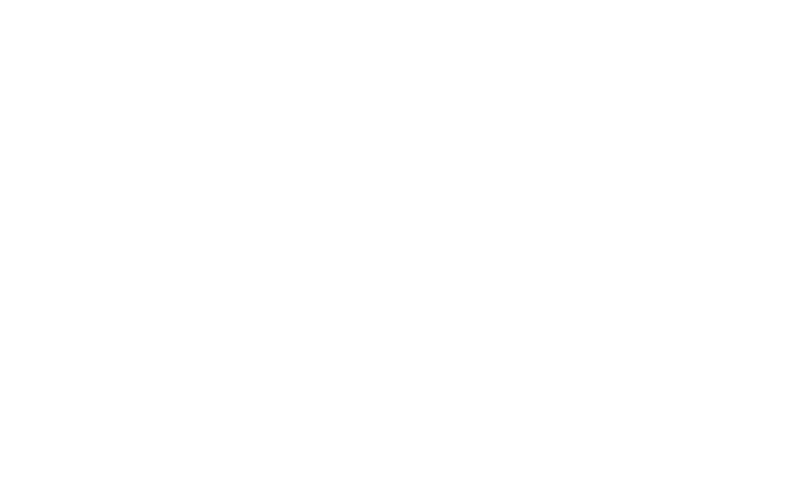

<IPython.core.display.Javascript object>


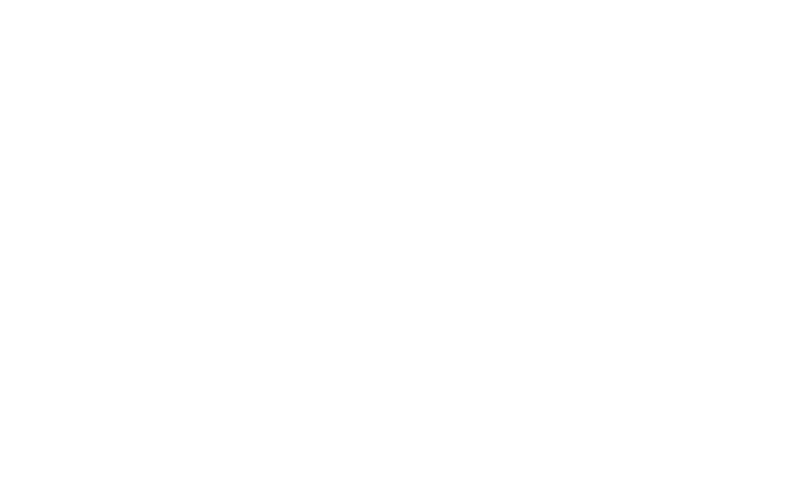

In [42]:
# plot results
%matplotlib notebook
plt.figure(figsize=(10,6))
plt.plot(lbias[:Ndepths], '*', c='r',linestyle='-',linewidth=2)
plt.plot(lvariance[:Ndepths], '*', c='k', linestyle='-',linewidth=2)
plt.plot(lnoise[:Ndepths], '*', c='g',linestyle='-',linewidth=2)
plt.plot(ltotal[:Ndepths], '*', c='b', linestyle='-',linewidth=2)
plt.plot(lsum[:Ndepths], '*', c='k', linestyle='--',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Depth",fontsize=18);
plt.ylabel("Squared Error",fontsize=18);
plt.xticks([i for i in range(Ndepths)], depths);